In [69]:

def model_learning_curve (estimator, X, y, n_splits, name):
    '''
        Plots the learning curve for the given classifier, using a k-fold cross validation
        with n_splits.

        Inputs:
            estimator: scikit-learn classifier
            X, y: dataset
            n_splits: # of folders for k-fold cross validation
            name: str: name of the classifier, to use in saving figure
    '''
    import matplotlib.pyplot as plt
    from sklearn.model_selection import learning_curve

    n_examples, train_scores, test_scores = learning_curve(estimator = estimator,
                                                                X = X,
                                                                y = y,
                                                                train_sizes = np.linspace(0.1,1.0,20),
                                                                cv = n_splits)


    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(n_examples, train_mean,
                        color='red', marker='*',
                        markersize = 2, label='Mean training accuracy')

    plt.plot(n_examples, test_mean,
                color='blue', marker='s', 
                markersize = 3, label='Mean validation accuracy',)

    plt.grid()
    plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel('Nº of Data points')
    plt.title('Learning Curve '+name)
    plt.ylim([0.0, 1.5])
    plt.ylabel('Accuracy')
    plt.savefig('LearningCurve '+name+'test.png')
    plt.show()

def model_validation (estimator, X, y, param_name, param, n_splits, name):
    '''
        Plots the validation curve for the given classifier, using a k-fold cross validation
        with n_splits over the parameter 'param' range.

        Inputs:
            estimator: scikit-learn classifier
            param_name, param: estimator parameter to iterate over
            X, y: dataset
            n_splits: # of folders for k-fold cross validation
            name: str: name of the classifier, to use in saving figure
    '''

    import matplotlib.pyplot as plt    
    from sklearn.model_selection import validation_curve
    train_scores, test_scores = validation_curve(estimator = estimator,
                                                X = X,
                                                y = y,
                                                param_name = param_name,
                                                param_range = param,
                                                cv = n_splits)


    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(param, train_mean,
            color='red', marker='*',
            markersize = 2, label='Mean training accuracy')

    plt.plot(param, test_mean,
            color='blue', marker='s', 
            markersize = 3, label='Mean validation accuracy')

    plt.grid()
    plt.xscale('log')
    plt.legend(loc='lower right')
    xlabel_name = pd.DataFrame(np.array([['Logistic Regression','SVM','Decision Tree','Random Forest','SGD'],
                                        ['C','C','Máx. Depth', 'Nº Estimators','Learning Rate']]).T, 
                                        columns = ['Classifier','Param'])

    plt.xlabel(str((xlabel_name[xlabel_name['Classifier']==name]['Param']).values[0]))

    plt.ylim([0.0, 1.2])
    plt.title('Validation Curve '+name)
    plt.ylabel('Accuracy')  
    plt.savefig('ValidationCurve'+name+'test.png')
    plt.show()


#Loading modules 

# Preprocessing and splitting modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (
train_test_split, KFold, GridSearchCV, StratifiedShuffleSplit)

# Learnign Algorithms Modules
from sklearn.linear_model import (
LogisticRegression, SGDClassifier, SGDRegressor)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np


In [158]:
# Folder path
path =  "../data/"

# Which values are considered NaN
na_vls = ['#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', 
               '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 
                'null', '...']

# Load datasets
df_products = pd.read_csv(path+"New_ProdutosVarejos.csv", na_values = na_vls)
df_clts = pd.read_csv(path+"New_Coletas.csv", na_values = na_vls)

df_join = df_products.merge(right = df_clts, how='inner',\
                    on = 'MasterKey_RetailerProduct').groupby(\
                        ["Department", "Category", "Customer", "Product","Specifics", "DateIns","Brand", "EAN", "Retailer"]\
                            ).mean()[["FinalPrice"]].reset_index()



C:\Users\luiza\AppData\Local\Temp\ipykernel_9580\3267694591.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).mean()[["FinalPrice"]].reset_index()


In [159]:
selected_customer = 'Unilever'
selected_brand = 'Dove'

df_join = df_join[(df_join["Customer"]==selected_customer)&
              (df_join["Brand"]==selected_brand)  ]

selected_product = 'Condicionador Dove Nutrição Óleo Micelar 400 ML'

df_join = df_join[(df_join["Product"]==selected_product)].groupby("DateIns")["FinalPrice"].mean().reset_index()
df_join

,DateIns,FinalPrice
0,2023-05-01,24.418526
1,2023-05-02,19.859409
2,2023-05-03,18.808351
3,2023-05-04,23.434342
4,2023-05-05,19.725118
...,...,...
56,2023-06-26,12.885814
57,2023-06-27,12.067209
58,2023-06-28,25.925293
59,2023-06-29,19.029601


Mean Squared Error: 28.369138015537352


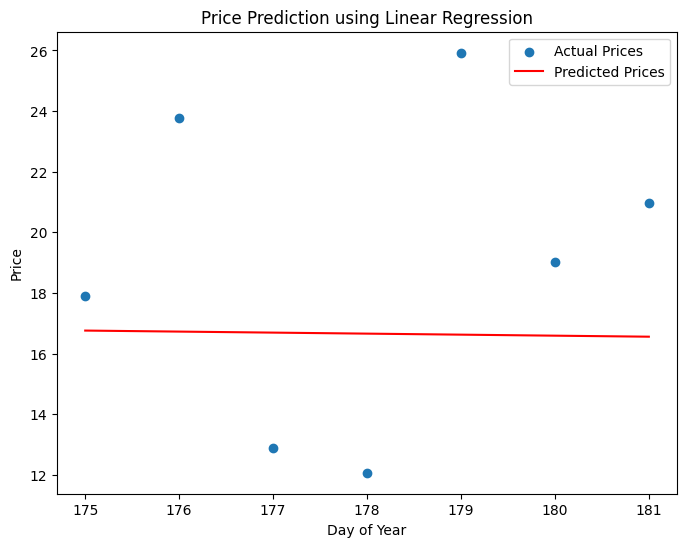

In [160]:
df = pd.DataFrame(df_join)

df['DateIns'] = pd.to_datetime(df['DateIns'])

# Feature engineering: Extract day of the year as a feature
df['DayOfYear'] = df['DateIns'].dt.dayofyear

df = df.reset_index()

# Split data into features (X) and target (y)
X = df[['DayOfYear']]
y = df["FinalPrice"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the predictions and actual prices
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual Prices')
plt.plot(X_test, y_pred, label='Predicted Prices', color='red')
plt.xlabel('Day of Year')
plt.ylabel('Price')
plt.title('Price Prediction using Linear Regression')
plt.legend()
plt.show()
